# Summer of Code - Artificial Intelligence
## Week 07: Advanced Machine Learning Models

### Day 04: Support Vector Machines and Decision Trees

In this notebook, we will explore **Support Vector Machines (SVM)** and **Decision Trees** using Python's Scikit-Learn library.


# Support Vector Machines (SVM)
A powerful machine learning algorithm used for classification and regression tasks.


In [11]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
type(iris)

sklearn.utils._bunch.Bunch

In [12]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
X = iris.data.values
y = iris.target.values
print(f"Features' shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features' shape: (150, 4)
Target shape: (150,)


In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
X = X[:100]
y = y[:100]
print(f"Features' shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features' shape: (100, 4)
Target shape: (100,)


In [86]:
iris.frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


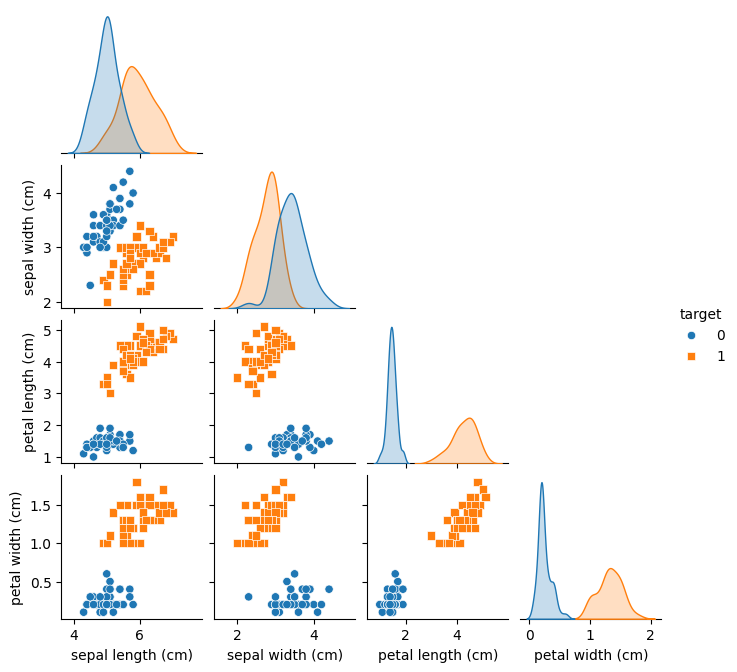

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    iris.frame.iloc[:100], hue="target", markers=["o", "s"], corner=True, height=1.7
)
plt.show()

## Linear SVM Classification
In linear SVM, the goal is to find the optimal hyperplane that separates different classes in the feature space. The hyperplane is chosen to maximize the margin between the classes.

<img src="linear_svm.png" alt="Linear SVM" width="800">

### Soft Margin Classification
In real-world scenarios, data is often not perfectly separable. Soft margin SVM allows some misclassifications by introducing slack variables. The objective is to find a balance between maximizing the margin and minimizing classification errors.

<img src="soft_margin_classification.png" alt="Soft Margin SVM" width="800">

In [27]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=1)
model.fit(X, y)

LinearSVC(C=1)

In [26]:
model.score(X, y)

1.0

## Non-Linear SVM Classification
When data is not linearly separable, SVM can use kernel functions to transform the data into a higher-dimensional space where a linear separation is possible.

In [82]:
from sklearn.datasets import make_moons

X, y = make_moons(
    n_samples=300,
    noise=0.1, random_state=42
)
X.shape, y.shape

((300, 2), (300,))

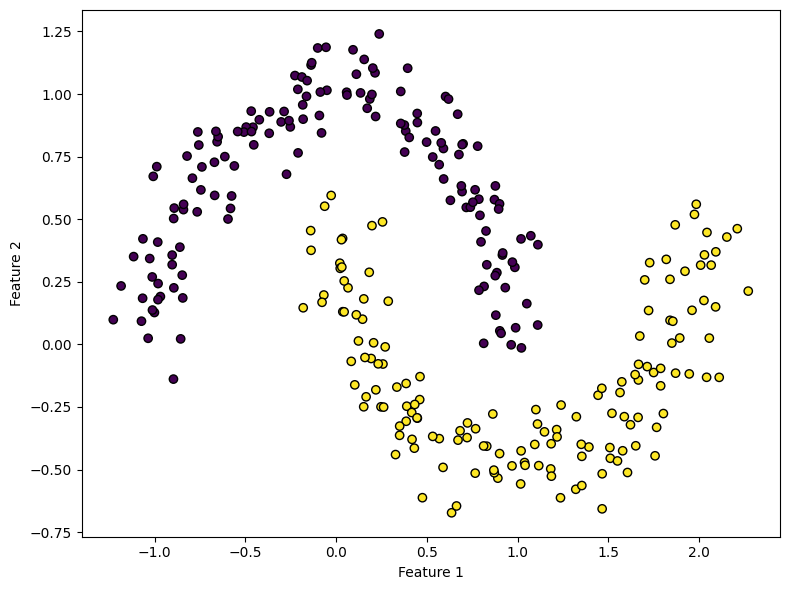

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

In [33]:
model.fit(X, y)

LinearSVC(C=1)

In [34]:
model.score(X, y)

0.8766666666666667

In [41]:
X[0]

array([ 0.68298822, -0.34520334])

In [42]:
y[0]

np.int64(1)

In [ ]:
import numpy as np


X_new = np.array([
    [0.0, 0.48]
])

model.predict(X_new) # False

array([0])

### Polynomial Features
By adding polynomial features, we can transform the original feature space into a higher-dimensional space where a linear decision boundary can be found.

<img src="non_linear_svm.png" alt="Non-Linear SVM" width="800">

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

model = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=1, max_iter=5000)
)

model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, max_iter=5000))])

In [47]:
model.score(X, y)

1.0

### Similarity Features
In this approach, we compute similarity features based on a set of landmarks. Each feature represents the similarity of a data point to a landmark.

<img src="similarity_features.png" alt="Similarity Features" width="800">

## Kernels
A kernel is a function that computes the similarity between two data points in the transformed feature space without explicitly performing the transformation. Common kernels include polynomial and radial basis function (RBF) kernels.

In [63]:
from sklearn.svm import SVC

model = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly', degree=3, C=1)
)
model.fit(X, y)
model.score(X, y)

0.8966666666666666

In [64]:
from sklearn.svm import SVC

model = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma="scale", C=1))
model.fit(X, y)
model.score(X, y)

1.0

## SVM Regression
SVM can also be used for regression tasks.


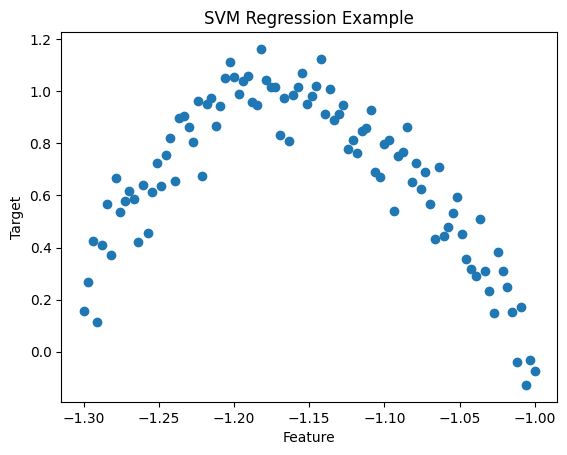

In [67]:
X = np.linspace(-1, -1.3, 100)
y = np.sin(3 * np.pi * X) + np.random.normal(0, 0.1, X.shape)

plt.scatter(X, y)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("SVM Regression Example")
plt.show()

In [70]:
from sklearn.svm import SVR

model = SVR(kernel="rbf", C=1, gamma="scale")
model.fit(X.reshape(-1, 1), y)

SVR(C=1)

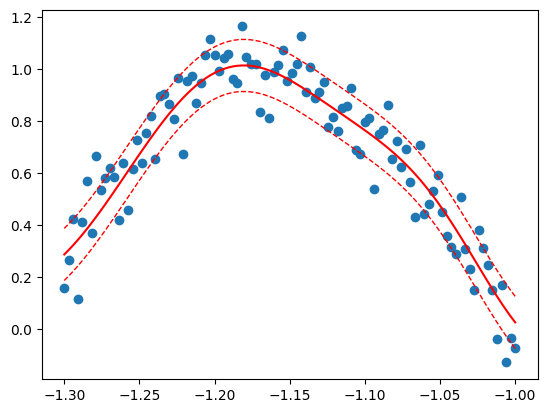

In [80]:
y_pred = model.predict(X.reshape(-1, 1))

plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.plot(X, y_pred + model.epsilon, "r--", lw=1, label="Margin (+epsilon)")
plt.plot(X, y_pred - model.epsilon, "r--", lw=1, label="Margin (-epsilon)")
# plt.legend()
plt.show()

In [78]:
model.epsilon

0.1